In [2]:
import pandas as pd, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Pizza_Sale.csv')
df1 = pd.read_csv('data/Pizza_ingredients.csv')

In [4]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.shape

(48620, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
# Step 1: Create a dictionary mapping from (pizza_ingredients, pizza_size) to pizza_name_id
temp_df_for_null = df.dropna(subset=['pizza_name_id']).groupby(
    ['pizza_ingredients', 'pizza_size']
)['pizza_name_id'].first().to_dict()

# Step 2: Use the dictionary to fill missing values
df['pizza_name_id'] = df.apply(
    lambda row: temp_df_for_null.get((row['pizza_ingredients'], row['pizza_size']))
    if pd.isna(row['pizza_name_id']) else row['pizza_name_id'],
    axis=1
)


In [8]:
# Step 1: Create a dictionary mapping from (pizza_ingredients, pizza_size) to pizza_name_id
temp_df_for_null = df.dropna(subset=['pizza_ingredients']).groupby(
    ['pizza_name_id']
)['pizza_ingredients'].first().to_dict()

# Step 2: Use the dictionary to fill missing values
df['pizza_ingredients'] = df.apply(
    lambda row: temp_df_for_null.get((row['pizza_name_id']))
    if pd.isna(row['pizza_ingredients']) else row['pizza_ingredients'],
    axis=1
)

In [9]:
# Step 1: Create a dictionary mapping from (pizza_ingredients, pizza_size) to pizza_name_id
temp_df_for_null = df.dropna(subset=['pizza_category']).groupby(
    ['pizza_name']
)['pizza_category'].first().to_dict()

# Step 2: Use the dictionary to fill missing values
df['pizza_category'] = df.apply(
    lambda row: temp_df_for_null.get((row['pizza_name']))
    if pd.isna(row['pizza_category']) else row['pizza_category'],
    axis=1
)

In [10]:
# Step 1: Create a dictionary mapping from (pizza_ingredients, pizza_size) to pizza_name_id
temp_df_for_null = df.dropna(subset=['pizza_name']).groupby(
    ['pizza_name_id']
)['pizza_name'].first().to_dict()

# # Step 2: Use the dictionary to fill missing values
df['pizza_name'] = df.apply(
    lambda row: temp_df_for_null.get((row['pizza_name_id']))
    if pd.isna(row['pizza_name']) else row['pizza_name'],
    axis=1
)

In [11]:
# Step 1: Create a dictionary mapping from (pizza_ingredients, pizza_size) to pizza_name_id
temp_df_for_null = df.dropna(subset=['total_price','unit_price','quantity']).groupby(
    ['pizza_name_id']
)['unit_price'].first().to_dict()

# # Step 2: Use the dictionary to fill missing values
df['total_price'] = df.apply(
    lambda row: temp_df_for_null.get((row['pizza_name_id']),row['unit_price']*int(row['quantity']))
    if pd.isna(row['total_price']) else row['total_price'],
    axis=1
    
)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [13]:
# need to standardize the date format
df['order_date'] = df['order_date'].str.replace('-', '/')

In [14]:
df['order_date'] = pd.to_datetime(df['order_date'],format="%d/%m/%Y", errors='raise')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [16]:
# Extract features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['day_of_week'] = df['order_date'].dt.dayofweek
df['week_number'] = df['order_date'].dt.isocalendar().week
df['is_weekend'] = df['order_date'].dt.dayofweek >= 5

In [17]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['order_date'].apply(get_season)


In [18]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day,day_of_week,week_number,is_weekend,season
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,1,1,3,1,False,Winter
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,1,1,3,1,False,Winter
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,1,1,3,1,False,Winter
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1,3,1,False,Winter
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,1,1,3,1,False,Winter


In [19]:
# Group by week_number and calculate aggregate values
df_weekly = df.groupby(['week_number','pizza_name_id']).agg({
    'quantity': 'sum'
}).reset_index()

df_weekly

,week_number,pizza_name_id,quantity
0,1,bbq_ckn_l,18
1,1,bbq_ckn_m,15
2,1,bbq_ckn_s,5
3,1,big_meat_s,21
4,1,brie_carre_s,3
...,...,...,...
4748,53,the_greek_s,1
4749,53,the_greek_xl,4
4750,53,veggie_veg_l,6
4751,53,veggie_veg_m,4


In [20]:
pizza_ids = df['pizza_name_id'].unique()
pizza_dfs = {}

for pizza_id in pizza_ids:
    pizza_dfs[pizza_id] = df_weekly[df_weekly['pizza_name_id'] == pizza_id].reset_index(drop=True)
    print(f"DataFrame for {pizza_id}:\n{pizza_dfs[pizza_id]}\n")


DataFrame for hawaiian_m:
    week_number pizza_name_id  quantity
0             1    hawaiian_m         5
1             2    hawaiian_m         5
2             3    hawaiian_m         3
3             4    hawaiian_m         4
4             5    hawaiian_m        11
5             6    hawaiian_m        11
6             7    hawaiian_m         8
7             8    hawaiian_m        12
8             9    hawaiian_m         8
9            10    hawaiian_m        18
10           11    hawaiian_m         9
11           12    hawaiian_m        10
12           13    hawaiian_m        10
13           14    hawaiian_m        13
14           15    hawaiian_m         9
15           16    hawaiian_m         6
16           17    hawaiian_m        11
17           18    hawaiian_m        10
18           19    hawaiian_m        11
19           20    hawaiian_m         5
20           21    hawaiian_m         6
21           22    hawaiian_m         9
22           23    hawaiian_m         8
23           2

Sales By Day

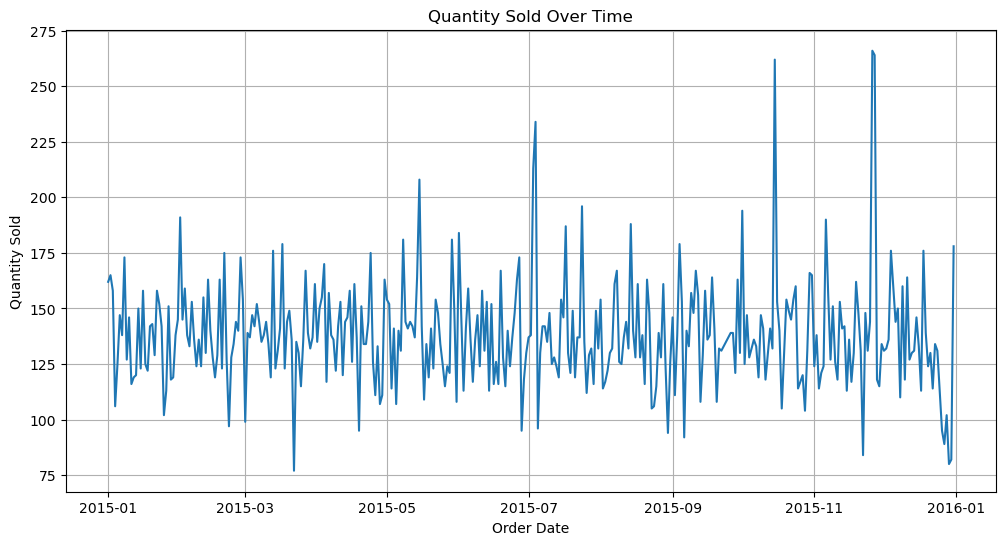

In [21]:
# Group by order date and sum the quantity
quantity_over_time = df.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()

Sales By Month

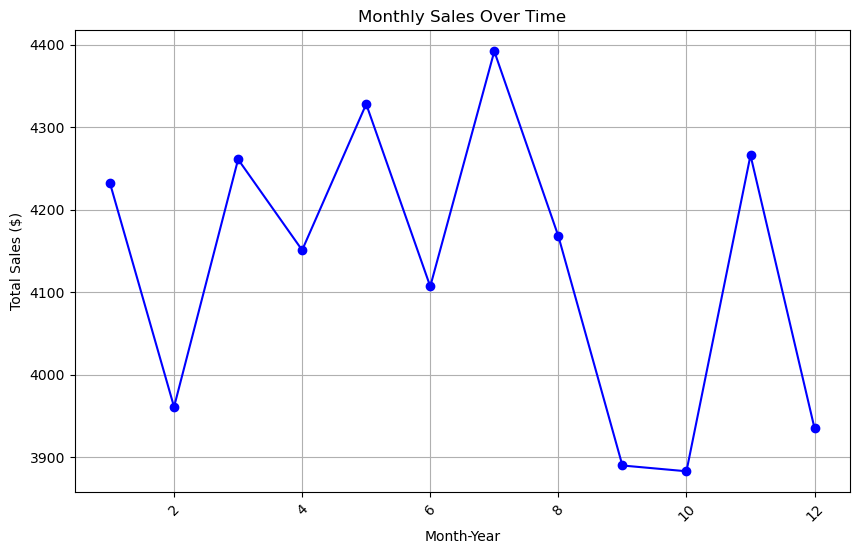

In [22]:

#Group by month and sum the 'total_price' for each month
monthly_sales = df.groupby('month')['quantity'].sum()

# Step 4: Plot the sales over months
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Sales By Week

In [24]:
# Group by 'week_year' and calculate total weekly sales
weekly_sales = df.groupby('week_number')['quantity'].sum().reset_index()

# Plot the sales by week with numbered weeks on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['week_number'], weekly_sales['quantity'], marker='o', color='b')
plt.title("Weekly Sales Over Time")
plt.xlabel("Week Number")
plt.ylabel("Total Sales ($)")
plt.xticks(ticks=weekly_sales['week_number'], labels=weekly_sales['week_number'], rotation=45)
plt.grid()
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1000x600 with 1 Axes>

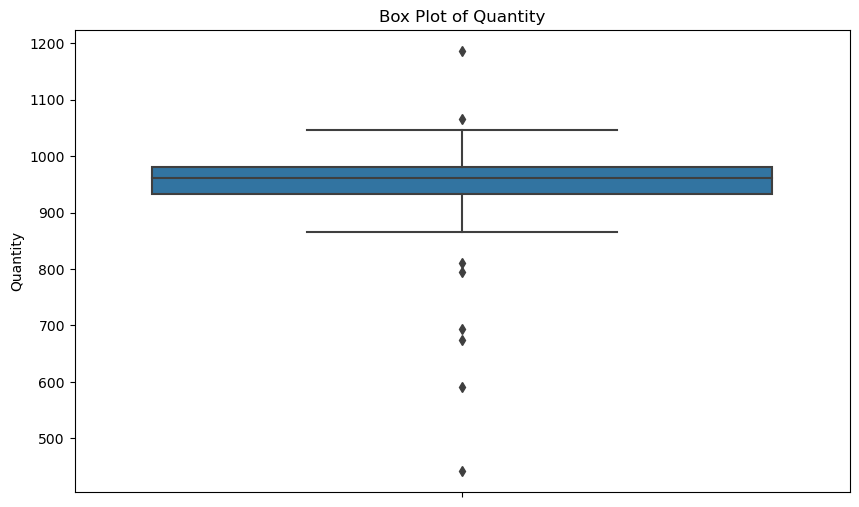

In [25]:
weekly_sales = df.groupby('week_number')['quantity'].sum().reset_index()

# Plot the box plot for the quantity column
plt.figure(figsize=(10, 6))
sns.boxplot(y=weekly_sales['quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.show()

In [26]:
# Group by week_number, pizza_name_id, and unit_price
grouped = df.groupby(['week_number', 'pizza_name_id', 'unit_price'])['quantity'].sum().reset_index()

# Calculate the weekly average quantity
weekly_avg = grouped.groupby(['pizza_name_id', 'unit_price'])['quantity'].median().reset_index()
weekly_avg = weekly_avg.rename(columns={'quantity': 'weekly_avg_quantity'})

# Sort the DataFrame by weekly_avg_quantity in descending order
sorted_df = weekly_avg.sort_values(by='weekly_avg_quantity', ascending=False).reset_index(drop=True)

sorted_df

,pizza_name_id,unit_price,weekly_avg_quantity
0,big_meat_s,12.00,36.0
1,thai_ckn_l,20.75,27.0
2,five_cheese_l,18.50,26.0
3,four_cheese_l,17.95,25.0
4,classic_dlx_m,16.00,22.0
...,...,...,...
86,mexicana_s,12.00,3.0
87,ckn_alfredo_s,12.75,2.0
88,calabrese_s,12.25,2.0
89,green_garden_l,20.25,2.0


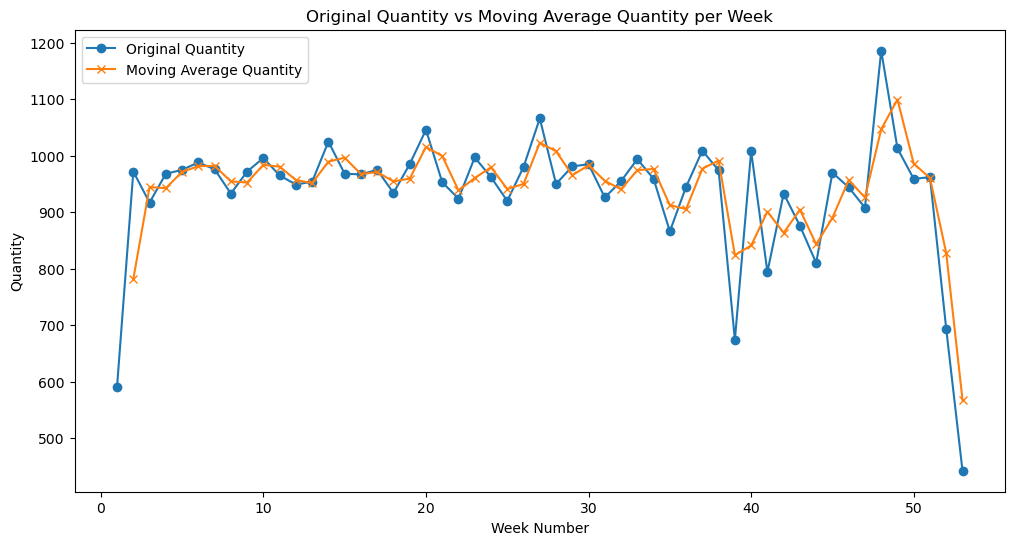

In [27]:
# Aggregate data by week_number
weekly_data = df.groupby('week_number')['quantity'].sum().reset_index()

# Calculate the moving average with a window of 3 weeks
weekly_data['moving_avg_quantity'] = weekly_data['quantity'].rolling(window=2).mean()

# Plot the original quantity and moving average
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['week_number'], weekly_data['quantity'], label='Original Quantity', marker='o')
plt.plot(weekly_data['week_number'], weekly_data['moving_avg_quantity'], label='Moving Average Quantity', marker='x')
plt.title('Original Quantity vs Moving Average Quantity per Week')
plt.xlabel('Week Number')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [28]:
pizza_sales = df.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()

In [29]:
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'])
full_dates = pd.date_range(start=pizza_sales['order_date'].min(),
                           end=pizza_sales['order_date'].max())

all_pizzas = pizza_sales['pizza_name_id'].unique()
complete_data = []

for pizza in all_pizzas:
    temp = pizza_sales[pizza_sales['pizza_name_id'] == pizza]
    temp = temp.set_index('order_date').reindex(full_dates, fill_value=0).reset_index()
    temp['pizza_name_id'] = pizza
    complete_data.append(temp)

pizza_sales = pd.concat(complete_data)
pizza_sales.rename(columns={'index': 'order_date'}, inplace=True)

In [ ]:
pizza_sales 

,order_date,pizza_name_id,quantity
0,2015-01-01,bbq_ckn_l,6
1,2015-01-02,bbq_ckn_l,3
2,2015-01-03,bbq_ckn_l,3
3,2015-01-04,bbq_ckn_l,6
4,2015-01-05,bbq_ckn_l,1
...,...,...,...
360,2015-12-27,the_greek_xxl,0
361,2015-12-28,the_greek_xxl,0
362,2015-12-29,the_greek_xxl,0
363,2015-12-30,the_greek_xxl,0


In [31]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day,day_of_week,week_number,is_weekend,season
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,1,1,3,1,False,Winter
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,1,1,3,1,False,Winter
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,1,1,3,1,False,Winter
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1,3,1,False,Winter
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,1,1,3,1,False,Winter


In [32]:
df['pizza_name_id'].nunique()

91

In [33]:
df['pizza_ingredients'].nunique()

32

In [34]:
df1.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [35]:
# Aggregate the data by 'order_date' and 'pizza_name_id'
aggregated_df = df.groupby(['order_date', 'pizza_name_id']).agg({
    'quantity': 'sum'
}).reset_index()

# Create separate DataFrames for each pizza ID and resample weekly
pizza_ids = df['pizza_name_id'].unique()
pizza_dfs = {}

for pizza_id in pizza_ids:
    temp_df = aggregated_df[aggregated_df['pizza_name_id'] == pizza_id]
    temp_df.set_index('order_date', inplace=True)
    # Drop the 'pizza_name_id' column
    temp_df = temp_df.drop('pizza_name_id', axis=1)

    pizza_dfs[pizza_id] = temp_df['quantity'].resample('W').sum()
    print(f"DataFrame for {pizza_id}:\n{pizza_dfs[pizza_id]}\n")


DataFrame for hawaiian_m:
order_date
2015-01-04     5
2015-01-11     5
2015-01-18     3
2015-01-25     4
2015-02-01    11
2015-02-08    11
2015-02-15     8
2015-02-22    12
2015-03-01     8
2015-03-08    18
2015-03-15     9
2015-03-22    10
2015-03-29    10
2015-04-05    13
2015-04-12     9
2015-04-19     6
2015-04-26    11
2015-05-03    10
2015-05-10    11
2015-05-17     5
2015-05-24     6
2015-05-31     9
2015-06-07     8
2015-06-14    13
2015-06-21    10
2015-06-28    15
2015-07-05    10
2015-07-12    13
2015-07-19     4
2015-07-26    14
2015-08-02     9
2015-08-09    12
2015-08-16    13
2015-08-23    13
2015-08-30     5
2015-09-06     8
2015-09-13    11
2015-09-20     8
2015-09-27     6
2015-10-04     8
2015-10-11     9
2015-10-18     8
2015-10-25     8
2015-11-01     3
2015-11-08     3
2015-11-15    13
2015-11-22     9
2015-11-29    11
2015-12-06    14
2015-12-13    13
2015-12-20     7
2015-12-27     8
2016-01-03     3
Freq: W-SUN, Name: quantity, dtype: int64

DataFrame for class

In [38]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
from pmdarima import auto_arima

In [39]:
adtftest = adfuller(pizza_dfs['hawaiian_m'])
adtftest[1]

0.029974198729688328

In [40]:
non_stationary = {}
for pizza_id in pizza_ids:
    adtftest = adfuller(pizza_dfs[pizza_id])
    if adtftest[1]>0.05:
        non_stationary[pizza_id] = adtftest[1]
        
non_stationary

{'classic_dlx_m': 0.16112308742105785,
 'the_greek_s': 0.06986062758804293,
 'green_garden_m': 0.6665056392715799}

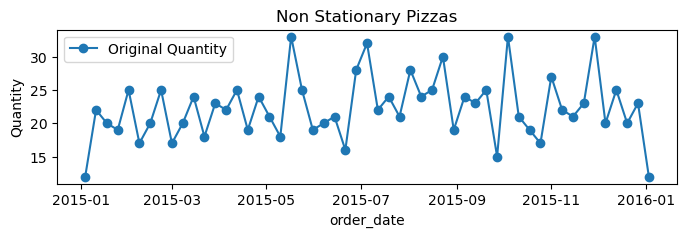

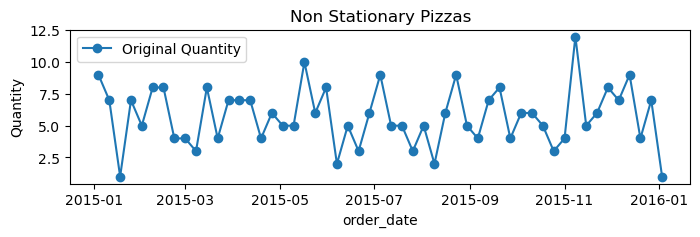

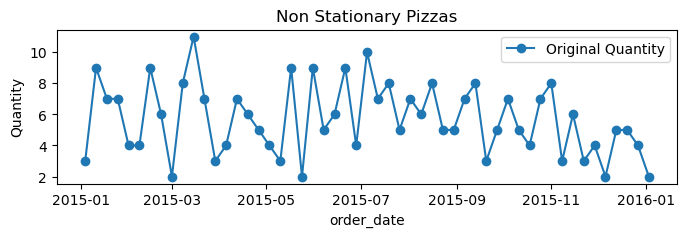

In [41]:
for pizza_id in non_stationary.keys():
    temp_df = pd.DataFrame(pizza_dfs[pizza_id])
    plt.figure(figsize=(8, 2))
    plt.plot(temp_df.index, temp_df['quantity'], label='Original Quantity', marker='o')
    plt.title('Non Stationary Pizzas')
    plt.xlabel('order_date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

In [38]:
auto_model = auto_arima(pizza_dfs['hawaiian_m'], seasonal=False, stepwise=True, trace=True)

auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=393.658, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=309.762, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=362.536, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=297.479, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=298.614, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=293.746, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=339.302, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=287.299, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=286.171, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=285.040, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=285.832, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:                        SARIMAX   Log Likelihood                -140.520
Date:                Sat, 30 Nov 2024   AIC                            285.040
Time:                        07:00:02   BIC                            288.981
Sample:                    01-04-2015   HQIC                           286.556
                         - 01-03-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.1132      0.471     19.339      0.000       8.190      10.037
sigma2        11.7608      2.583      4.553      0.000       6.698      16.823
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.28   Prob(JB):                         0.81
Heteroskedasticity (H):               0.87   Skew:                             0.03
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
import itertools
p = range(0,8)
d = range(0,8)
q = range(0,2)

pdq_comb = list(itertools.product(p, d, q))

In [ ]:
import warnings
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Suppress warnings
warnings.filterwarnings("ignore")

best_result = []

for pizza_id in pizza_ids:
    for pdq in pdq_comb:
        try:
            # Fit the ARIMA model
            model = ARIMA(pizza_dfs[pizza_id], order=pdq).fit()
            
            # Make predictions
            predicted_values = model.forecast(steps=len(pizza_dfs[pizza_id]))
            
            # Calculate MAPE
            mape = mean_absolute_percentage_error(pizza_dfs[pizza_id], predicted_values)
            
            # Store the MAPE and corresponding pdq
            best_result.append({
                'pdq': pdq,
                'MAPE': mape,
                'pizza': pizza_id
            })
            
        except:
            continue
    print(f"done {pizza_id}")

# Find the best pdq combination with the lowest MAPE for each pizza_id
for pizza_id in pizza_ids:
    results_for_pizza = [result for result in best_result if result['pizza'] == pizza_id]
    if results_for_pizza:
        best_pdq = min(results_for_pizza, key=lambda x: x['MAPE'])
        print(f"Best pdq for pizza {pizza_id}: {best_pdq['pdq']}")
        print(f"Best MAPE for pizza {pizza_id}: {best_pdq['MAPE']}")



done hawaiian_m
done classic_dlx_m
done five_cheese_l
done ital_supr_l
done mexicana_m
done thai_ckn_l
done ital_supr_m
done prsc_argla_l
done bbq_ckn_s
done the_greek_s
done spinach_supr_s
done classic_dlx_s
done green_garden_s
done ital_cpcllo_l
done ital_supr_s
done mexicana_s
done spicy_ital_l
done spin_pesto_l
done veggie_veg_s
done mexicana_l
done southw_ckn_l
done bbq_ckn_l
done cali_ckn_l
done cali_ckn_m
done pepperoni_l
done cali_ckn_s
done ckn_pesto_l
done big_meat_s
done soppressata_l
done four_cheese_l
done napolitana_s
done calabrese_m
done four_cheese_m
done ital_veggie_s
done mediterraneo_m
done peppr_salami_s
done spinach_fet_l
done napolitana_l
done sicilian_l
done ital_cpcllo_m
done southw_ckn_s
done bbq_ckn_m
done pepperoni_m
done prsc_argla_s
done sicilian_m
done veggie_veg_l
done ckn_alfredo_s
done pepperoni_s
done green_garden_l
done green_garden_m
done pep_msh_pep_l
done hawaiian_s
done peppr_salami_m
done ckn_alfredo_m
done peppr_salami_l
done spin_pesto_s
done 

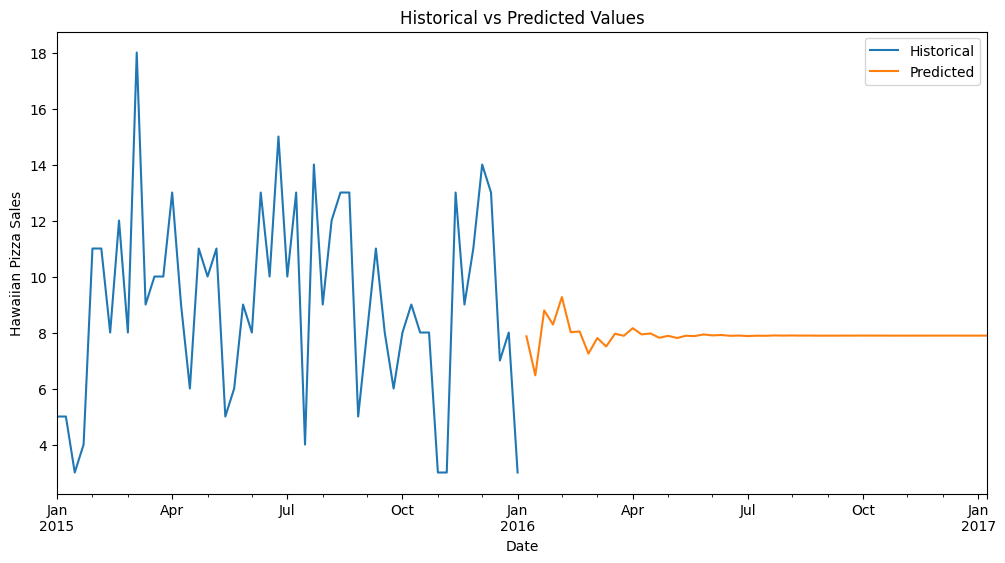

MAPE: 0.39


,historical,predicted
2015-01-04,5.0,NaN
2015-01-11,5.0,NaN
2015-01-18,3.0,NaN
2015-01-25,4.0,NaN
2015-02-01,11.0,NaN
...,...,...
2016-12-11,NaN,7.889683
2016-12-18,NaN,7.889536
2016-12-25,NaN,7.889588
2017-01-01,NaN,7.889522


In [89]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Ensure the data is indexed by date
pizza_dfs['hawaiian_m'].index = pd.to_datetime(pizza_dfs['hawaiian_m'].index)

# Fit the ARIMA model
model = ARIMA(pizza_dfs['hawaiian_m'], order=(7, 1, 0)).fit()

# Make predictions for the next n periods (here we use the length of the historical data)
n_periods = len(pizza_dfs['hawaiian_m'])
forecast = model.forecast(steps=n_periods)


# Combine historical and predicted data for comparison
historical_data = pizza_dfs['hawaiian_m']
comparison_df = pd.DataFrame({
    'historical': historical_data,
    'predicted': forecast
})

# Calculate MAPE
mape = mean_absolute_percentage_error(comparison_df['historical'][:53], comparison_df['predicted'][53:])

# Plot the historical and predicted values
comparison_df.plot(figsize=(12, 6))
plt.title('Historical vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Hawaiian Pizza Sales')
plt.legend(['Historical', 'Predicted'])
plt.show()

print(f"MAPE: {mape:.2f}")
comparison_df

Sarimax training

In [91]:
import warnings
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Suppress warnings
warnings.filterwarnings("ignore")


best_result = []

for pizza_id in pizza_ids:
    for pdq in pdq_comb:
        try:
            # Fit the SARIMAX model
            model = SARIMAX(pizza_dfs[pizza_id], order=pdq, seasonal_order=(0, 0, 0, 0)).fit()
            
            # Make predictions
            predicted_values = model.forecast(steps=len(pizza_dfs[pizza_id]))
            
            # Calculate MAPE
            mape = mean_absolute_percentage_error(pizza_dfs[pizza_id], predicted_values)
            
            # Store the MAPE and corresponding seasonal order
            best_result.append({
                'seasonal_order': pdq,
                'MAPE': mape,
                'pizza': pizza_id
            })
            
        except:
            continue

    filtered_results = [result for result in best_result if result['MAPE'] < 0.10 and result['pizza'] == pizza_id]
    print(filtered_results)

    
# Find the best seasonal order combination with the lowest MAPE for each pizza_id
for pizza_id in pizza_ids:
    results_for_pizza = [result for result in best_result if result['pizza'] == pizza_id]
    if results_for_pizza:
        best_seasonal = min(results_for_pizza, key=lambda x: x['MAPE'])
        print(f"Best seasonal order for pizza {pizza_id}: {best_seasonal['seasonal_order']}")
        print(f"Best MAPE for pizza {pizza_id}: {best_seasonal['MAPE']}")


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Best seasonal order for pizza hawaiian_m: (7, 1, 0)
Best MAPE for pizza hawaiian_m: 0.39273028677166777
Best seasonal order for pizza classic_dlx_m: (5, 2, 1)
Best MAPE for pizza classic_dlx_m: 0.16777378711455457
Best seasonal order for pizza five_cheese_l: (0, 1, 1)
Best MAPE for pizza five_cheese_l: 0.24355160528365025
Best seasonal order for pizza ital_supr_l: (7, 1, 0)
Best MAPE for pizza ital_supr_l: 0.3184968361753984
Best seasonal order for pizza mexicana_m: (7, 2, 1)
Best MAPE for pizza mexicana_m: 0.41879027320241
Best seasonal order for pizza thai_ckn_l: (5, 1, 1)
Best MAPE for pizza thai_ckn_l: 0.17698561093934032
Best seasonal order for pizza ital_supr_m: (1, 1, 1)
Best MAPE for pizza ital_supr_m: 0.23497

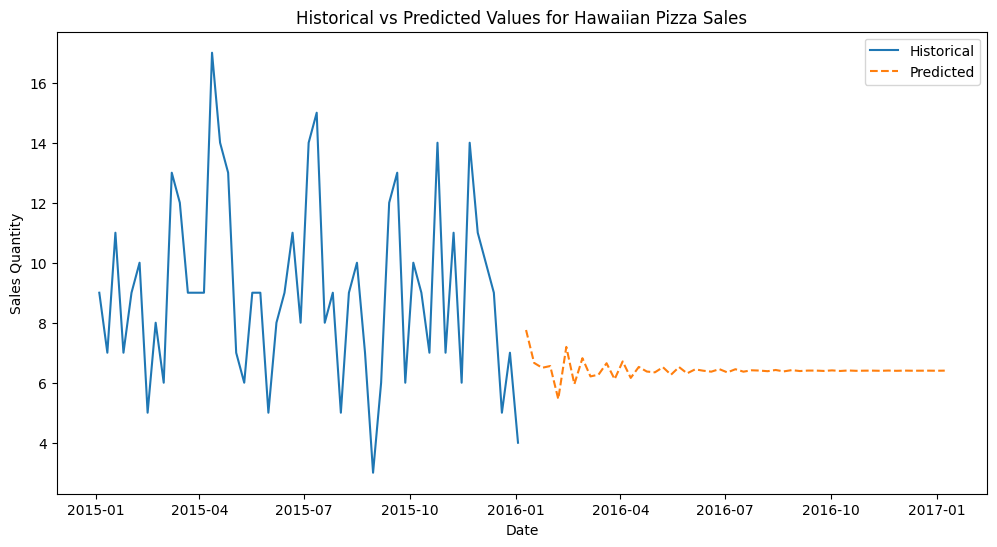

In [92]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suppress warnings
warnings.filterwarnings("ignore")

pizza_id = 'thai_ckn_m'  # Replace with your specific pizza_id

# Fit the SARIMAX model
model = SARIMAX(pizza_dfs[pizza_id], order=(7, 1, 0), seasonal_order=(0, 0, 0, 0)).fit()

# Make predictions for the same period as the historical data
predicted_values = model.forecast(steps=len(pizza_dfs[pizza_id]))

# Combine historical and predicted data for plotting
comparison_df = pd.DataFrame({
    'historical': pizza_dfs[pizza_id],
    'predicted': predicted_values
})

# Plot the historical and predicted values
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['historical'], label='Historical')
plt.plot(comparison_df['predicted'], label='Predicted', linestyle='--')
plt.title('Historical vs Predicted Values for Hawaiian Pizza Sales')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend(['Historical', 'Predicted'])
plt.show()


In [42]:
from prophet import Prophet

In [47]:
pd.DataFrame(pizza_dfs['hawaiian_m'])

,quantity
order_date,
2015-01-04,5
2015-01-11,5
2015-01-18,3
2015-01-25,4
2015-02-01,11
2015-02-08,11
2015-02-15,8
2015-02-22,12
2015-03-01,8


In [121]:
data1 = pizza_dfs['big_meat_s'].reset_index().rename(columns={'order_date': 'ds', 'quantity': 'y'})

data1




,ds,y
0,2015-01-04,21
1,2015-01-11,35
2,2015-01-18,29
3,2015-01-25,38
4,2015-02-01,36
5,2015-02-08,41
6,2015-02-15,33
7,2015-02-22,35
8,2015-03-01,36
9,2015-03-08,39


In [122]:
model = Prophet()
model.fit(data1)

09:27:15 - cmdstanpy - INFO - Chain [1] start processing
09:27:15 - cmdstanpy - INFO - Chain [1] done processing


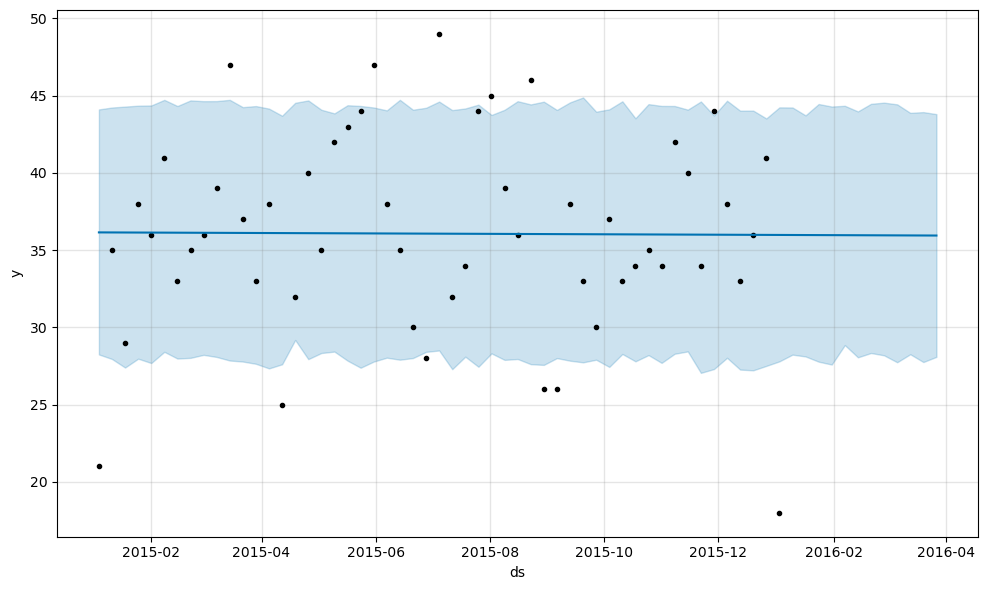

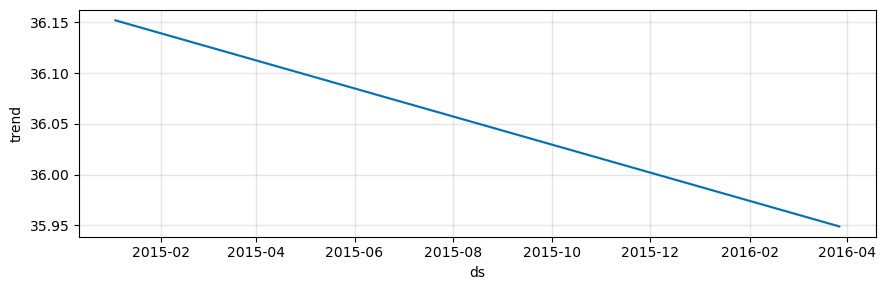

In [123]:
# Step 6: Make a future dataframe
future = model.make_future_dataframe(periods=12,freq='W')

# Step 7: Predict
forecast = model.predict(future)

# Step 8: Plot the forecast
model.plot(forecast)
plt.show()

# Step 9: Plot the components
model.plot_components(forecast)
plt.show()


09:33:50 - cmdstanpy - INFO - Chain [1] start processing
09:33:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\AppData\Local\Temp\ipykernel_10252\1398361302.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  model.plot(forecast).show()
C:\Users\User\AppData\Local\Temp\ipykernel_10252\1398361302.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  model.plot_components(forecast).show()


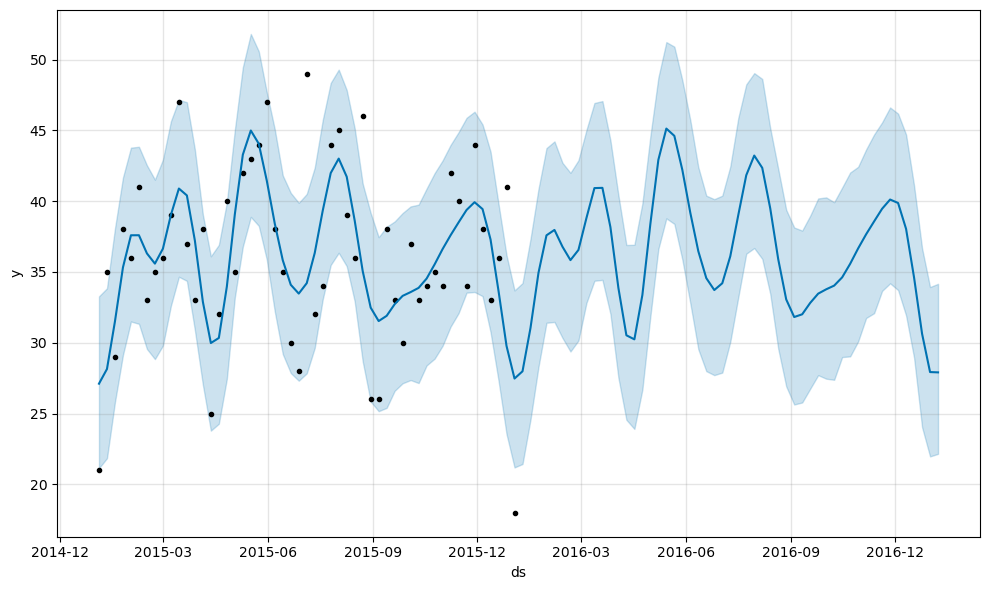

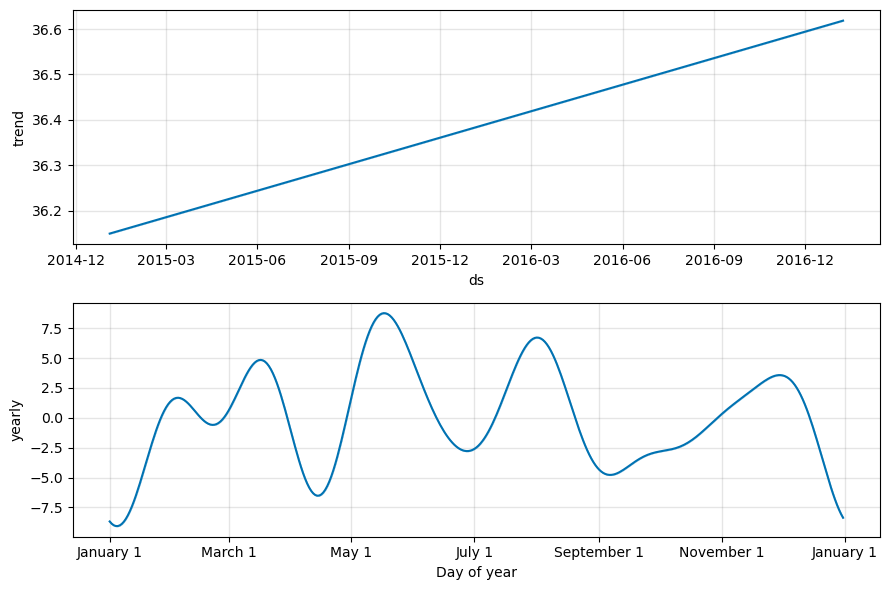

In [132]:

# Initialize the model with tuned parameters
model = Prophet(
    growth='linear',
    yearly_seasonality=8

)

# Add custom seasonality


# Fit the model
model.fit(data1)

# Create a future dataframe
future = model.make_future_dataframe(periods=53, freq='W')

# Predict
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast).show()
model.plot_components(forecast).show()


In [126]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt


In [127]:
df_cv = cross_validation(
    model,
    initial='20 W',  # Initial training period of 100 weeks
    period='10 W',   # Period between folds of 20 weeks
    horizon='10 W'   # Forecast horizon of 10 weeks
)


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

09:28:34 - cmdstanpy - INFO - Chain [1] start processing
09:28:34 - cmdstanpy - INFO - Chain [1] done processing
09:28:35 - cmdstanpy - INFO - Chain [1] start processing
09:28:35 - cmdstanpy - INFO - Chain [1] done processing
09:28:35 - cmdstanpy - INFO - Chain [1] start processing
09:28:35 - cmdstanpy - INFO - Chain [1] done processing


In [128]:
df_p = performance_metrics(df_cv)
df_p


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,430.023863,20.737017,18.749025,0.475722,0.589749,0.655310,0.0
1,14 days,1880.530377,43.365082,31.047356,1.032215,0.462891,0.920936,0.0
2,21 days,9839.947235,99.196508,73.220997,2.575830,1.259296,1.054214,0.0
3,28 days,42722.575822,206.694402,170.005653,3.877394,4.109583,1.334882,0.0
4,35 days,119096.172905,345.103134,290.127761,8.863441,12.081703,1.395943,0.0
5,42 days,260961.311669,510.843725,424.605594,13.364349,16.053415,1.479470,0.0
6,49 days,394752.557082,628.293369,508.208852,12.976700,12.620143,1.511371,0.0
7,56 days,402241.052680,634.224765,488.438599,13.635614,9.418400,1.481282,0.0
8,63 days,238278.242071,488.137524,342.898064,9.820519,4.582902,1.433261,0.0
9,70 days,52142.093232,228.346432,172.054565,5.353530,2.836460,1.308666,0.0


In [59]:
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
413,2016-12-29
414,2016-12-30
415,2016-12-31
416,2017-01-01


In [129]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
101,2016-12-11,3.560136,32.290652,44.103305,3.560134,3.560139,34.651025,34.651025,34.651025,33.340834,33.340834,33.340834,1.310191,1.310191,1.310191,0.0,0.0,0.0,38.211162
102,2016-12-18,3.569208,28.248628,40.928298,3.569206,3.569211,31.220047,31.220047,31.220047,33.340834,33.340834,33.340834,-2.120787,-2.120787,-2.120787,0.0,0.0,0.0,34.789255
103,2016-12-25,3.578280,24.604260,36.222325,3.578278,3.578282,27.293395,27.293395,27.293395,33.340834,33.340834,33.340834,-6.047439,-6.047439,-6.047439,0.0,0.0,0.0,30.871675
104,2017-01-01,3.587352,21.660358,34.821127,3.587349,3.587354,24.651844,24.651844,24.651844,33.340834,33.340834,33.340834,-8.688990,-8.688990,-8.688990,0.0,0.0,0.0,28.239196
105,2017-01-08,3.596424,22.165975,34.402463,3.596421,3.596426,24.701264,24.701264,24.701264,33.340834,33.340834,33.340834,-8.639571,-8.639571,-8.639571,0.0,0.0,0.0,28.297687


In [136]:
from sklearn.metrics import mean_absolute_percentage_error

In [137]:
best_result = []
pizza_ids = list(pizza_dfs.keys())

for pizza_id in pizza_ids:
    try:
        # Prepare the data
        data =  pizza_dfs[pizza_id].reset_index().rename(columns={'order_date': 'ds', 'quantity': 'y'})
        
        # Train the Prophet model
        model = Prophet(growth='linear', yearly_seasonality=8)
        model.fit(data)
        
        # Make a future dataframe for weekly prediction
        future = model.make_future_dataframe(periods=53, freq='W')
        
        # Make predictions
        forecast = model.predict(future)
        
        # Calculate MAPE for the historical data
        actual = data['y'].values
        predicted = forecast['yhat'].values[:len(actual)]
        mape = mean_absolute_percentage_error(actual, predicted)
        
        # Store the MAPE and pizza_id
        best_result.append({
            'pizza': pizza_id,
            'MAPE': mape
        })
        
    except Exception as e:
        print(f"Error processing {pizza_id}: {e}")
        continue
    print(f"Done {pizza_id}")

# Calculate the average MAPE
average_mape = sum(result['MAPE'] for result in best_result) / len(best_result)
print(f"Average MAPE: {average_mape:.2f}%")

# Find the best MAPE for each pizza
for pizza_id in pizza_ids:
    results_for_pizza = [result for result in best_result if result['pizza'] == pizza_id]
    if results_for_pizza:
        best_result_for_pizza = min(results_for_pizza, key=lambda x: x['MAPE'])
        print(f"Best MAPE for pizza {pizza_id}: {best_result_for_pizza['MAPE']:.2f}%")


09:38:59 - cmdstanpy - INFO - Chain [1] start processing
09:38:59 - cmdstanpy - INFO - Chain [1] done processing
09:38:59 - cmdstanpy - INFO - Chain [1] start processing


Done hawaiian_m


09:38:59 - cmdstanpy - INFO - Chain [1] done processing
09:39:00 - cmdstanpy - INFO - Chain [1] start processing


Done classic_dlx_m


09:39:00 - cmdstanpy - INFO - Chain [1] done processing
09:39:00 - cmdstanpy - INFO - Chain [1] start processing


Done five_cheese_l


09:39:00 - cmdstanpy - INFO - Chain [1] done processing
09:39:00 - cmdstanpy - INFO - Chain [1] start processing


Done ital_supr_l


09:39:01 - cmdstanpy - INFO - Chain [1] done processing
09:39:01 - cmdstanpy - INFO - Chain [1] start processing


Done mexicana_m


09:39:01 - cmdstanpy - INFO - Chain [1] done processing
09:39:01 - cmdstanpy - INFO - Chain [1] start processing


Done thai_ckn_l


09:39:02 - cmdstanpy - INFO - Chain [1] done processing
09:39:02 - cmdstanpy - INFO - Chain [1] start processing


Done ital_supr_m


09:39:02 - cmdstanpy - INFO - Chain [1] done processing
09:39:02 - cmdstanpy - INFO - Chain [1] start processing


Done prsc_argla_l


09:39:02 - cmdstanpy - INFO - Chain [1] done processing
09:39:03 - cmdstanpy - INFO - Chain [1] start processing


Done bbq_ckn_s


09:39:03 - cmdstanpy - INFO - Chain [1] done processing
09:39:03 - cmdstanpy - INFO - Chain [1] start processing


Done the_greek_s


09:39:03 - cmdstanpy - INFO - Chain [1] done processing
09:39:03 - cmdstanpy - INFO - Chain [1] start processing


Done spinach_supr_s


09:39:04 - cmdstanpy - INFO - Chain [1] done processing
09:39:04 - cmdstanpy - INFO - Chain [1] start processing


Done classic_dlx_s


09:39:04 - cmdstanpy - INFO - Chain [1] done processing
09:39:04 - cmdstanpy - INFO - Chain [1] start processing


Done green_garden_s


09:39:04 - cmdstanpy - INFO - Chain [1] done processing
09:39:05 - cmdstanpy - INFO - Chain [1] start processing


Done ital_cpcllo_l


09:39:05 - cmdstanpy - INFO - Chain [1] done processing
09:39:05 - cmdstanpy - INFO - Chain [1] start processing


Done ital_supr_s


09:39:05 - cmdstanpy - INFO - Chain [1] done processing
09:39:05 - cmdstanpy - INFO - Chain [1] start processing


Done mexicana_s


09:39:06 - cmdstanpy - INFO - Chain [1] done processing
09:39:06 - cmdstanpy - INFO - Chain [1] start processing


Done spicy_ital_l


09:39:06 - cmdstanpy - INFO - Chain [1] done processing
09:39:06 - cmdstanpy - INFO - Chain [1] start processing


Done spin_pesto_l


09:39:07 - cmdstanpy - INFO - Chain [1] done processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing


Done veggie_veg_s


09:39:07 - cmdstanpy - INFO - Chain [1] done processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing


Done mexicana_l


09:39:08 - cmdstanpy - INFO - Chain [1] done processing
09:39:08 - cmdstanpy - INFO - Chain [1] start processing


Done southw_ckn_l


09:39:08 - cmdstanpy - INFO - Chain [1] done processing
09:39:08 - cmdstanpy - INFO - Chain [1] start processing


Done bbq_ckn_l


09:39:08 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] start processing


Done cali_ckn_l


09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] start processing


Done cali_ckn_m


09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:10 - cmdstanpy - INFO - Chain [1] start processing


Done pepperoni_l


09:39:10 - cmdstanpy - INFO - Chain [1] done processing
09:39:10 - cmdstanpy - INFO - Chain [1] start processing


Done cali_ckn_s


09:39:10 - cmdstanpy - INFO - Chain [1] done processing
09:39:11 - cmdstanpy - INFO - Chain [1] start processing


Done ckn_pesto_l


09:39:11 - cmdstanpy - INFO - Chain [1] done processing
09:39:11 - cmdstanpy - INFO - Chain [1] start processing


Done big_meat_s


09:39:11 - cmdstanpy - INFO - Chain [1] done processing
09:39:12 - cmdstanpy - INFO - Chain [1] start processing


Done soppressata_l


09:39:12 - cmdstanpy - INFO - Chain [1] done processing
09:39:12 - cmdstanpy - INFO - Chain [1] start processing


Done four_cheese_l


09:39:12 - cmdstanpy - INFO - Chain [1] done processing
09:39:12 - cmdstanpy - INFO - Chain [1] start processing


Done napolitana_s


09:39:13 - cmdstanpy - INFO - Chain [1] done processing
09:39:13 - cmdstanpy - INFO - Chain [1] start processing


Done calabrese_m


09:39:13 - cmdstanpy - INFO - Chain [1] done processing
09:39:13 - cmdstanpy - INFO - Chain [1] start processing


Done four_cheese_m


09:39:14 - cmdstanpy - INFO - Chain [1] done processing
09:39:14 - cmdstanpy - INFO - Chain [1] start processing


Done ital_veggie_s


09:39:14 - cmdstanpy - INFO - Chain [1] done processing
09:39:14 - cmdstanpy - INFO - Chain [1] start processing


Done mediterraneo_m


09:39:14 - cmdstanpy - INFO - Chain [1] done processing
09:39:15 - cmdstanpy - INFO - Chain [1] start processing


Done peppr_salami_s


09:39:15 - cmdstanpy - INFO - Chain [1] done processing
09:39:15 - cmdstanpy - INFO - Chain [1] start processing


Done spinach_fet_l


09:39:15 - cmdstanpy - INFO - Chain [1] done processing
09:39:15 - cmdstanpy - INFO - Chain [1] start processing


Done napolitana_l


09:39:16 - cmdstanpy - INFO - Chain [1] done processing
09:39:16 - cmdstanpy - INFO - Chain [1] start processing


Done sicilian_l


09:39:16 - cmdstanpy - INFO - Chain [1] done processing
09:39:16 - cmdstanpy - INFO - Chain [1] start processing


Done ital_cpcllo_m


09:39:16 - cmdstanpy - INFO - Chain [1] done processing
09:39:17 - cmdstanpy - INFO - Chain [1] start processing


Done southw_ckn_s


09:39:17 - cmdstanpy - INFO - Chain [1] done processing
09:39:17 - cmdstanpy - INFO - Chain [1] start processing


Done bbq_ckn_m


09:39:17 - cmdstanpy - INFO - Chain [1] done processing
09:39:17 - cmdstanpy - INFO - Chain [1] start processing


Done pepperoni_m


09:39:18 - cmdstanpy - INFO - Chain [1] done processing
09:39:18 - cmdstanpy - INFO - Chain [1] start processing


Done prsc_argla_s


09:39:18 - cmdstanpy - INFO - Chain [1] done processing
09:39:18 - cmdstanpy - INFO - Chain [1] start processing


Done sicilian_m


09:39:18 - cmdstanpy - INFO - Chain [1] done processing
09:39:19 - cmdstanpy - INFO - Chain [1] start processing


Done veggie_veg_l


09:39:19 - cmdstanpy - INFO - Chain [1] done processing
09:39:19 - cmdstanpy - INFO - Chain [1] start processing


Done ckn_alfredo_s


09:39:19 - cmdstanpy - INFO - Chain [1] done processing
09:39:19 - cmdstanpy - INFO - Chain [1] start processing


Done pepperoni_s


09:39:20 - cmdstanpy - INFO - Chain [1] done processing
09:39:20 - cmdstanpy - INFO - Chain [1] start processing


Done green_garden_l


09:39:20 - cmdstanpy - INFO - Chain [1] done processing
09:39:20 - cmdstanpy - INFO - Chain [1] start processing


Done green_garden_m


09:39:20 - cmdstanpy - INFO - Chain [1] done processing
09:39:21 - cmdstanpy - INFO - Chain [1] start processing


Done pep_msh_pep_l


09:39:21 - cmdstanpy - INFO - Chain [1] done processing
09:39:21 - cmdstanpy - INFO - Chain [1] start processing


Done hawaiian_s


09:39:21 - cmdstanpy - INFO - Chain [1] done processing
09:39:21 - cmdstanpy - INFO - Chain [1] start processing


Done peppr_salami_m


09:39:22 - cmdstanpy - INFO - Chain [1] done processing
09:39:22 - cmdstanpy - INFO - Chain [1] start processing


Done ckn_alfredo_m


09:39:22 - cmdstanpy - INFO - Chain [1] done processing
09:39:22 - cmdstanpy - INFO - Chain [1] start processing


Done peppr_salami_l


09:39:23 - cmdstanpy - INFO - Chain [1] done processing
09:39:23 - cmdstanpy - INFO - Chain [1] start processing


Done spin_pesto_s


09:39:23 - cmdstanpy - INFO - Chain [1] done processing
09:39:23 - cmdstanpy - INFO - Chain [1] start processing


Done thai_ckn_m


09:39:23 - cmdstanpy - INFO - Chain [1] done processing
09:39:24 - cmdstanpy - INFO - Chain [1] start processing


Done classic_dlx_l


09:39:24 - cmdstanpy - INFO - Chain [1] done processing
09:39:24 - cmdstanpy - INFO - Chain [1] start processing


Done ckn_pesto_m


09:39:24 - cmdstanpy - INFO - Chain [1] done processing
09:39:24 - cmdstanpy - INFO - Chain [1] start processing


Done the_greek_xl


09:39:24 - cmdstanpy - INFO - Chain [1] done processing
09:39:25 - cmdstanpy - INFO - Chain [1] start processing


Done hawaiian_l


09:39:25 - cmdstanpy - INFO - Chain [1] done processing
09:39:25 - cmdstanpy - INFO - Chain [1] start processing


Done pep_msh_pep_s


09:39:25 - cmdstanpy - INFO - Chain [1] done processing
09:39:25 - cmdstanpy - INFO - Chain [1] start processing


Done spinach_supr_m


09:39:26 - cmdstanpy - INFO - Chain [1] done processing
09:39:26 - cmdstanpy - INFO - Chain [1] start processing


Done prsc_argla_m


09:39:26 - cmdstanpy - INFO - Chain [1] done processing
09:39:26 - cmdstanpy - INFO - Chain [1] start processing


Done mediterraneo_l


09:39:26 - cmdstanpy - INFO - Chain [1] done processing
09:39:27 - cmdstanpy - INFO - Chain [1] start processing


Done southw_ckn_m


09:39:27 - cmdstanpy - INFO - Chain [1] done processing
09:39:27 - cmdstanpy - INFO - Chain [1] start processing


Done pep_msh_pep_m


09:39:27 - cmdstanpy - INFO - Chain [1] done processing
09:39:28 - cmdstanpy - INFO - Chain [1] start processing


Done sicilian_s


09:39:28 - cmdstanpy - INFO - Chain [1] done processing
09:39:28 - cmdstanpy - INFO - Chain [1] start processing


Done spicy_ital_s


09:39:28 - cmdstanpy - INFO - Chain [1] done processing
09:39:28 - cmdstanpy - INFO - Chain [1] start processing


Done thai_ckn_s


09:39:29 - cmdstanpy - INFO - Chain [1] done processing
09:39:29 - cmdstanpy - INFO - Chain [1] start processing


Done spinach_supr_l


09:39:29 - cmdstanpy - INFO - Chain [1] done processing
09:39:30 - cmdstanpy - INFO - Chain [1] start processing


Done ital_veggie_l


09:39:30 - cmdstanpy - INFO - Chain [1] done processing
09:39:30 - cmdstanpy - INFO - Chain [1] start processing


Done veggie_veg_m


09:39:30 - cmdstanpy - INFO - Chain [1] done processing
09:39:31 - cmdstanpy - INFO - Chain [1] start processing


Done the_greek_m


09:39:31 - cmdstanpy - INFO - Chain [1] done processing
09:39:31 - cmdstanpy - INFO - Chain [1] start processing


Done ckn_pesto_s


09:39:31 - cmdstanpy - INFO - Chain [1] done processing
09:39:31 - cmdstanpy - INFO - Chain [1] start processing


Done spinach_fet_s


09:39:32 - cmdstanpy - INFO - Chain [1] done processing
09:39:32 - cmdstanpy - INFO - Chain [1] start processing


Done spicy_ital_m


09:39:32 - cmdstanpy - INFO - Chain [1] done processing
09:39:32 - cmdstanpy - INFO - Chain [1] start processing


Done ital_veggie_m


09:39:33 - cmdstanpy - INFO - Chain [1] done processing
09:39:33 - cmdstanpy - INFO - Chain [1] start processing


Done ital_cpcllo_s


09:39:33 - cmdstanpy - INFO - Chain [1] done processing
09:39:33 - cmdstanpy - INFO - Chain [1] start processing


Done mediterraneo_s


09:39:33 - cmdstanpy - INFO - Chain [1] done processing
09:39:34 - cmdstanpy - INFO - Chain [1] start processing


Done spinach_fet_m


09:39:34 - cmdstanpy - INFO - Chain [1] done processing
09:39:34 - cmdstanpy - INFO - Chain [1] start processing


Done napolitana_m


09:39:34 - cmdstanpy - INFO - Chain [1] done processing
09:39:34 - cmdstanpy - INFO - Chain [1] start processing


Done spin_pesto_m


09:39:35 - cmdstanpy - INFO - Chain [1] done processing
09:39:35 - cmdstanpy - INFO - Chain [1] start processing


Done brie_carre_s


09:39:35 - cmdstanpy - INFO - Chain [1] done processing
09:39:35 - cmdstanpy - INFO - Chain [1] start processing


Done ckn_alfredo_l


09:39:36 - cmdstanpy - INFO - Chain [1] done processing
09:39:36 - cmdstanpy - INFO - Chain [1] start processing


Done calabrese_s


09:39:36 - cmdstanpy - INFO - Chain [1] done processing
09:39:36 - cmdstanpy - INFO - Chain [1] start processing


Done the_greek_l


09:39:36 - cmdstanpy - INFO - Chain [1] done processing
09:39:36 - cmdstanpy - INFO - Chain [1] start processing


Done soppressata_m


09:39:37 - cmdstanpy - INFO - Chain [1] done processing
09:39:37 - cmdstanpy - INFO - Chain [1] start processing


Done soppressata_s


09:39:37 - cmdstanpy - INFO - Chain [1] done processing
09:39:37 - cmdstanpy - INFO - Chain [1] start processing


Done calabrese_l


09:39:37 - cmdstanpy - INFO - Chain [1] done processing


Done the_greek_xxl
Average MAPE: 61920771172033.75%
Best MAPE for pizza hawaiian_m: 0.26%
Best MAPE for pizza classic_dlx_m: 0.16%
Best MAPE for pizza five_cheese_l: 0.14%
Best MAPE for pizza ital_supr_l: 0.24%
Best MAPE for pizza mexicana_m: 0.29%
Best MAPE for pizza thai_ckn_l: 0.15%
Best MAPE for pizza ital_supr_m: 0.17%
Best MAPE for pizza prsc_argla_l: 0.49%
Best MAPE for pizza bbq_ckn_s: 0.34%
Best MAPE for pizza the_greek_s: 0.35%
Best MAPE for pizza spinach_supr_s: 0.38%
Best MAPE for pizza classic_dlx_s: 0.20%
Best MAPE for pizza green_garden_s: 0.19%
Best MAPE for pizza ital_cpcllo_l: 0.23%
Best MAPE for pizza ital_supr_s: 0.57%
Best MAPE for pizza mexicana_s: 323086722319284.12%
Best MAPE for pizza spicy_ital_l: 0.18%
Best MAPE for pizza spin_pesto_l: 392679711641294.88%
Best MAPE for pizza veggie_veg_s: 0.38%
Best MAPE for pizza mexicana_l: 0.21%
Best MAPE for pizza southw_ckn_l: 0.17%
Best MAPE for pizza bbq_ckn_l: 0.15%
Best MAPE for pizza cali_ckn_l: 0.19%
Best MAPE for 